- Figure object is a container that holds everything that we see
- Axes is the canvas on which we will draw our data

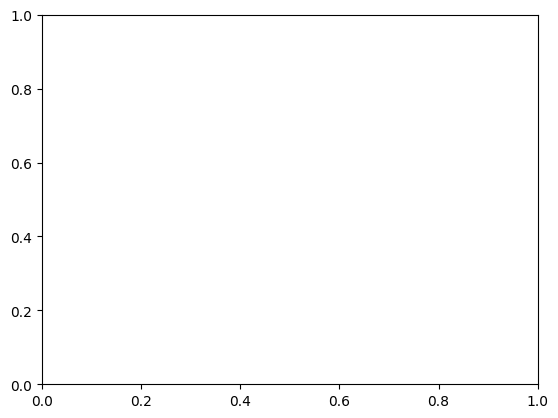

In [1]:
import matplotlib.pyplot as plt
# Creating an empty Figure and Axes
fig, ax = plt.subplots()
plt.show()

In [ ]:
# Adding data to the figure
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'] ) # Adding plot for Seattle weather for average monthly temp vs month
ax.plot(austin_weather['MONTH'],austin_weather['MTY-TAVG-NORMAL'] )   # Adding plot for Austin weather for average monthly temp vs month
plt.show()

## CUSTOMIZING PLOTS ##

In [ ]:
# Orignal added data
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'] ) # Adding plot for Seattle weather for average monthly temp vs month
# ADDING MARKERS TO THE PLOT
# Marker argument can be "o", "v".....
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'], marker = "0" ) 

# CHANGING LINESTYLE
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'], marker = "0", linestyle = "--" )
# linestyle = "None" eliminates the line completly
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'], marker = "0", linestyle = "--" )

# CHANGING COLOR
ax.plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'], marker = "0", linestyle = "--", color = "r")

# SETTING LABELS
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temperature (Fahrenheit degrees)")
ax.set_title("Weather in Seattle")

plt.show()

## SMALL MULTIPLES ##

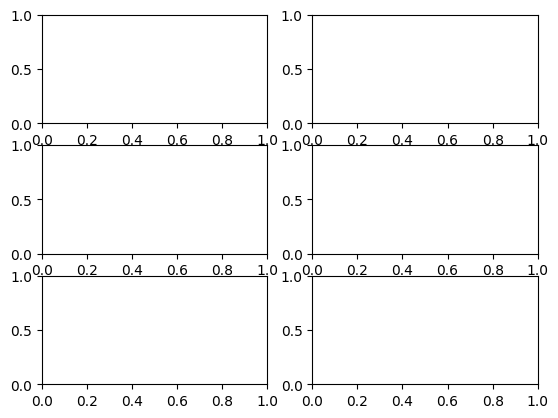

In [2]:
fig, ax = plt.subplots(3,2) # fig, ax = plt.subplots(rows, columns) 
plt.show()

In [ ]:
# ADDING DATA TO SUBPLOTS

ax[0, 0].plot(seattle_weather['MONTH'],seattle_weather['MTY-TAVG-NORMAL'], color = "b") 

# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = "b")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = "b", linestyle = "--")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = "b", linestyle = "--")

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = "r")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color = "r", linestyle = "--")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color = "r", linestyle = "--")
plt.show()

## TIME SERIES DATA ##

DATASET: Climate change time series data
- missing values(NaN) are represented as breaks in a graph

In [ ]:
import matplotlib as plt
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"])
ax.set_xlabel['Time']
ax.set_ylabel['CO2 (ppm)']
plt.show()

### Plotting two Time Series Together

In [ ]:
import pandas as pd
climate_change = pd.read_csv('climate_change.csv', parse_dates = ['date'], index_col='date')

# Two measurments may have different scales

fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color = "blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)")
ax.tick_params('y', colors = "blue")

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"], color = "red")
ax2.set_ylabel("Relative Temperature (Celcius)", color = "red")
ax2.tick_params('y', colors = "red")

plt.show()


# Defining a Function to plot time series data

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors = color)

### Annotating Time Series Data 

In [ ]:
# ANNOTATING TIME SERIES DATA
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'Relative tempereature (Celsius)')

# Annotating a timedate argument
# Syntax: axes.annotate("Annotation Text", xy = x_coord_to_annotate, y_coord_to_annotate), xytext = (x_coord_of_text, y_coord_of_text))
ax2.annotate(">1 degree", xy = (pd.Timestamp("2015-10-06"), 1), xytext = (pd.Timestamp('2008-10-06'), -0.2))

# Adding Arrow to Annotated Text 
# Syntax: ax2.annotate(">1 degree", xy = (pd.Timestamp("2015-10-06"), 1), xytext = (pd.Timestamp('2008-10-06'), -0.2), arrowprops = {arrow_properties})
ax2.annotate(">1 degree", xy = (pd.Timestamp("2015-10-06"), 1), xytext = (pd.Timestamp('2008-10-06'), -0.2), aroowprops = {"arrowstyle":"->", "color":"gray"})

## Quantitative Comparissions between parts of Data ##

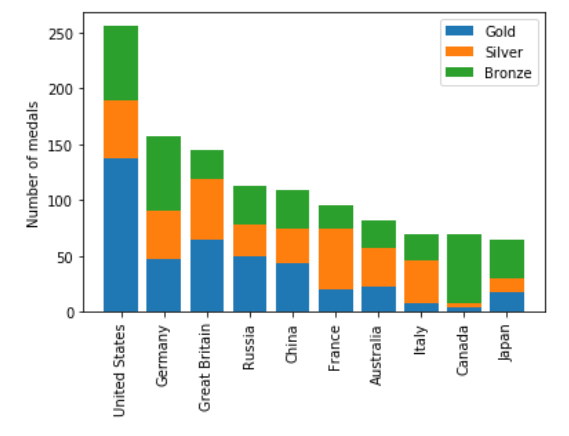

In [ ]:
# Read from a csv file and select the first column as index(index_col = 0=0)
medals = pd.read_csv('medals_by_country.csv', index_col = 0)

fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])

# Creating a stacked bar chart to show Gols, Silver and Bronze Medals
ax.bar(medals.index, medals["Silver"], bottom = medals["Gold"], label = "Silver")
ax.bar(medals.index, medals["Bronze"], bottom = medals["Gold"] + medals["Silver"], , label = "Bronze")

# Fixing Overlapping by rotating the text
ax.set_xticklabels(medals.index, rotation = 90)
# Setting y label
ax.set_label("Number of Medals")

# Adding a legend
ax.legend()

plt.show()

## Histograms ##

- Default number of bins in Histogram is 10

In [ ]:
# Data about Athletes who participated in the 2016 Olympic Games

fig, ax = plt.subplots()
# Comparission of heights using a bar chart:
ax.bar("Rowing", mens_rowing["Height"].mean())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean())
ax.set_ylabel("Height (cm)")
plt.show()

# Histogram
# histtype = "step" makes the visual of the histogram in the form of a line instead of the default bar
ax.hist(mens_rowing["Height"], label = "Rowing", bins = 5, histtype = "step")
ax.hist(mens_gymnastics["Height"], label = "Gymnastics", bins = 5, histtype = "step")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Observations")
ax.legend()
plt.show()

## Statistical Plotting ##

- Set of methods for using visualization to make comparision

1) Adding Error bars
- Additional markers on the plot that tell us something more about the distribution of the data


In [ ]:
# Adding Error Bars - Method 1 - Using the bar graph
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr  = mens_rowing["Height"].std())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr  = mens_gymnastics["Height"].std())
ax.set_ylabel("Height (cm)")
plt.show()

# Method 2 - using the .errorbar function on a line plot
fig, ax = plt.subplots()
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr = seattle_weather["MLY-TVG-STDDEV"])
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr = austin_weather["MLY-TVG-STDDEV"])
ax.set_label("Temperature (Fahrenheit)")
plt.show()

# Adding Boxplots
fig, ax = plt.subplots()
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")
plt.show()


## Scatter Plots ##

- Used for bivariate comparission - Comparing the values of different variables 

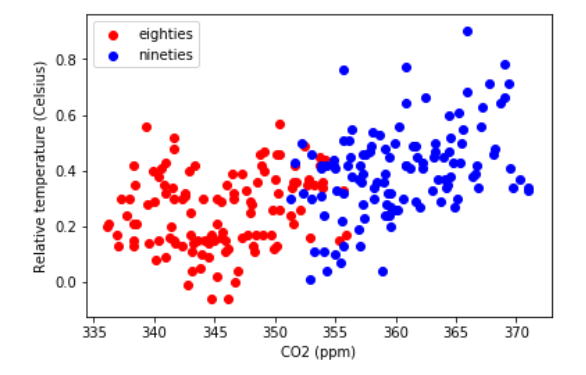

# Encoding a Third Variable by Color
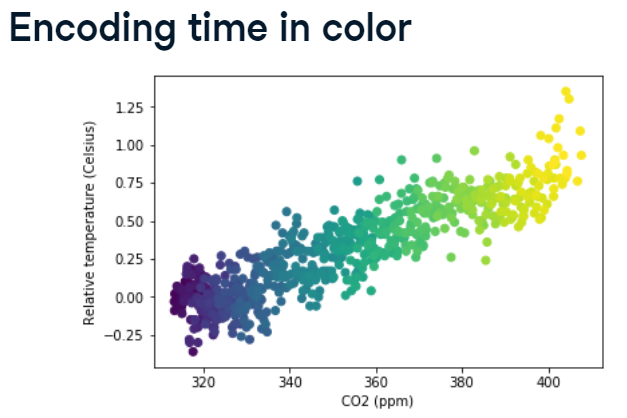

In [ ]:
# Climate Change Dataset is used

fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative Temperature (Celsius)")
plt.show()

# CUSTOMISING SCATTER PLOTS
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]
fig, ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"], color = "red", label = "eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color = "blue", label = "nineties")
ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative Temperature (Celsius)")
plt.show()

# Encoding a Third Variable by Color
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c = climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative Temperature (Celsius)")
plt.show()

## Sharing Figures ##

Guidelines for choosing plot style:
- Dark backgrounds are less visible
- if color is important, consider colorblind friendly options like seaborn-colorblind
- If the figure has to be printed, use less ink and dont consider using style with a grey background
- If the printer is black and white, use style "grayscale" 

### Default Plot
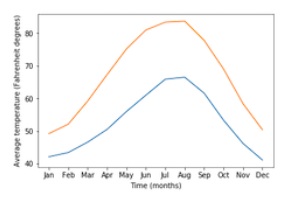

### GGPLOT Style
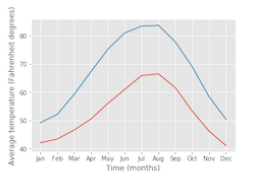

### bmh Style
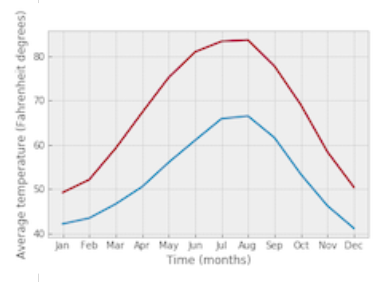

### Seaborn Colorblind Style
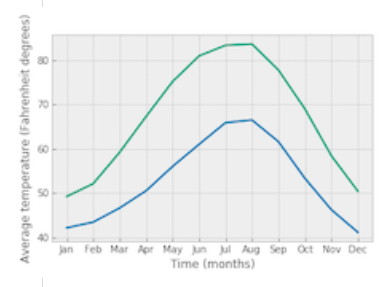

In [ ]:
# Customization of Figure Style
# Default plot
import matplotlib.pyplot as plt
plt.style.use("default")
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temperature (Fahrenheit degrees)")
plt.show()

# GGPLOT STYLE
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.plot(sea
ttle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temperature (Fahrenheit degrees)")
plt.show()

# bmh Style
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.plot(sea
ttle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temperature (Fahrenheit degrees)")
plt.show()

# Seaborn Style
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.plot(sea
ttle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average Temperature (Fahrenheit degrees)")
plt.show()

### Sharing Visualizations 


In [ ]:
# Sharing Figures

fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel("Number of medals")
fig.savefig("gold_medals.png")

# Different file formats
fig.savefig("gold_medals.jpg", quality = 50)
fig.savefig("gold_medals.svg")

# Setting Resolution
# dpi = dots per inch
fig.savefig("gold_medals.png", dpi = 300)

# Setting size of figure
fig.set_size_inches([5, 3])

## Automating Figures from Data ##

In [ ]:
# Getting unique values of a column
sports = summer_2016_medals["Sport"].unique()
print(sports)

# Cisualizing the height of the athletes in each sports with stddev error bar given that we dont know the number of sports

for sport in sports:
    sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
    ax.bar(sport, sport_df["Height"].mean(), yerr = sport_df["Height"].std())
    ax.set_ylabel("Height (cm)")
    ax.set_xticklabels(sports, rotation = 90)
    plt.show() 